## Verification of Voltage mean and variance

In [54]:
try:
    import paramiko
except ModuleNotFoundError:
    import sys
    !conda install --yes --prefix {sys.prefix} paramiko
    import paramiko

    
import numpy as np
import select


In [129]:
host = "192.168.0.162"
port = 8022
user = "noah"
i = 0
numQueries = 10000
voltageSamples = []

In [130]:
sshc = paramiko.SSHClient()
sshc.set_missing_host_key_policy(paramiko.AutoAddPolicy())
sshc.connect(hostname=host,port=port,username=user,password='')

In [134]:
def get_voltage(client):
    transport = client.get_transport()
    channel = transport.open_session()
    channel.exec_command("tsu -c cat /sys/class/power_supply/battery/voltage_now")

    while True:
        if channel.exit_status_ready():
            break
        rl, wl, xl = select.select([channel], [], [], 0.0)
        if len(rl) > 0:
            return(channel.recv(1024))

In [135]:
while i < numQueries:
    v_curr = get_voltage(sshc)

    if v_curr != None:
        voltageSamples.append(int(v_curr.decode('utf-8').strip()))
        if i % 50 == 0:
            print(voltageSamples)
        i = i+1
    

[3994130]
[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503]
[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

[3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3994130, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3812246, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3811513, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3810048, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3805654, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3801503, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3795400, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3780507, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779775, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3779287, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3793935, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3787343, 3790517, 3790517, 

KeyboardInterrupt: 

In [163]:
data = np.asarray(voltageSamples)
data = data/1e6

In [164]:
bins = np.unique(data)

stddev = np.std(data)
var = np.var(data)
mean = np.mean(data)

In [165]:
def reject_outliers(data, m = 5.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

In [166]:
data_filtered = reject_outliers(data)
bins_filtered = np.unique(data_filtered)

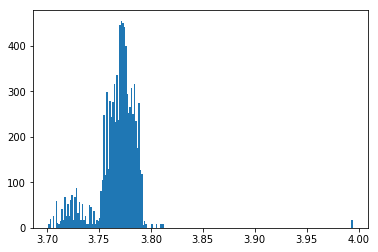

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data,bins.shape[0])
plt.show()

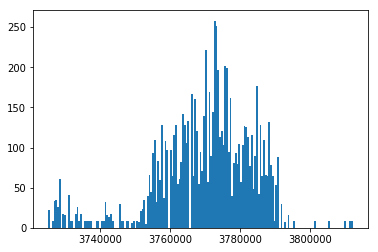

In [161]:
plt.hist(data_filtered,bins_filtered.shape[0])
plt.show()

In [172]:
print("mu: ", mean)
print("\u03C3^2: ", var)


mu:  3.7674707673451024
σ^2:  0.00043480817818414925


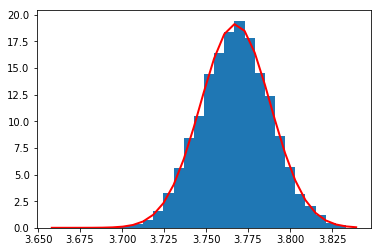

In [171]:
mu = mean
variance = var
sigma = stddev

dist = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(dist, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')